Tradução: Gabriel S. Ferrante

# **Dilatação, Erosão e Detecção de bordas**

####**Iremos aprender muitos tópicos:**
1. Dilatação
2. Erosão
3. Abertura
4. Fechamento
5. Detecção de bordas Canny

In [1]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


- **Dilatação** – Adiciona pixels aos limites dos objetos em uma imagem  
- **Erosão** – Remove pixels nos limites dos objetos em uma imagem
- **Opening** - Erosão seguida por Dilatação
- **Closing** - Dilatação seguida por Erosão 

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.19.08%20pm.png)

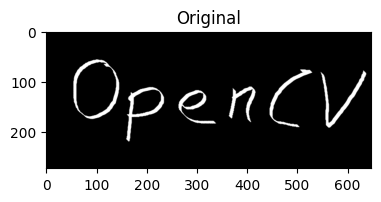

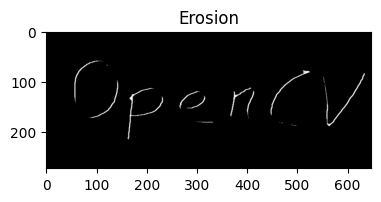

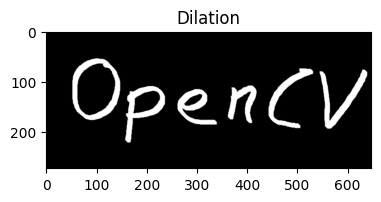

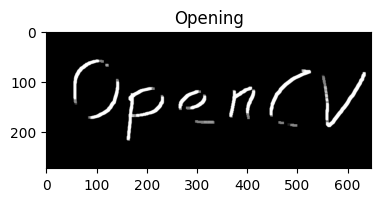

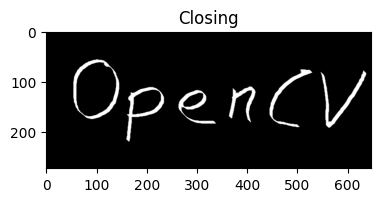

In [2]:
import cv2
import numpy as np

image = cv2.imread('images/opencv_inv.png', 0)
imshow('Original', image)

# Matriz de 1's de 5 x 5
kernel = np.ones((5,5), np.uint8)

# Erosão, passando a imagem, o kernel, e o numero de vezes que será aplicado o kernel
erosion = cv2.erode(image, kernel, iterations = 1)
imshow('Erosion', erosion)

# Função dilate, para dilatação
dilation = cv2.dilate(image, kernel, iterations = 1)
imshow('Dilation', dilation)


"""
aplicar operações morfológicas em uma imagem binária (onde os pixels são geralmente apenas preto e branco).
 Essas operações são baseadas na morfologia matemática e servem para processar formas e estruturas na imagem, 
 ajudando em tarefas como a remoção de ruído, preenchimento de lacunas e refinamento de bordas.
"""
# Opening - Bom para remover ruidos
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
imshow('Opening',opening)

# Closing - Bom para preencher espaços em branco
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
imshow('Closing',closing)

## **Canny Edge Detection** 

O Canny Edge Detection é uma técnica de processamento de imagens usada para detectar bordas em imagens. Foi desenvolvida por John F. Canny em 1986 e é conhecida por ser uma das técnicas mais eficientes para detecção de bordas. O processo busca identificar áreas de uma imagem onde ocorrem mudanças bruscas de intensidade, que normalmente representam contornos de objetos.

- Redução de Ruído: Usa-se um filtro Gaussiano para suavizar a imagem e reduzir o ruído que pode interferir na detecção de bordas.

- Cálculo do Gradiente: A imagem é derivada em relação aos eixos x e y usando filtros de Sobel, para obter a magnitude e a direção do gradiente. Isso ajuda a identificar onde as bordas podem estar.

- Supressão de Não-Máximos: O método Canny usa essa etapa para manter apenas os pixels que representam as bordas mais fortes. Ele compara cada pixel com seus vizinhos em direção ao gradiente e mantém apenas os que têm a maior intensidade.

- Limiar com Histerese: Para definir quais bordas manter, o método usa dois limiares (alto e baixo). As bordas com intensidade acima do limiar mais alto são mantidas, enquanto aquelas entre os dois limiares só são mantidas se estiverem conectadas a uma borda forte.

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.24.15%20pm.png)

- O primeiro argumento é uma imagem.
- O segundo e o terceiro são minVal e maxVal respectivamente.
- O quarto argumento é aperture_size. É o tamanho do kernel Sobel usado para encontrar gradientes de imagem. Por padrão é 3.

A detecção de borda precisa de um limite para dizer qual diferença/mudança deve ser contada como borda

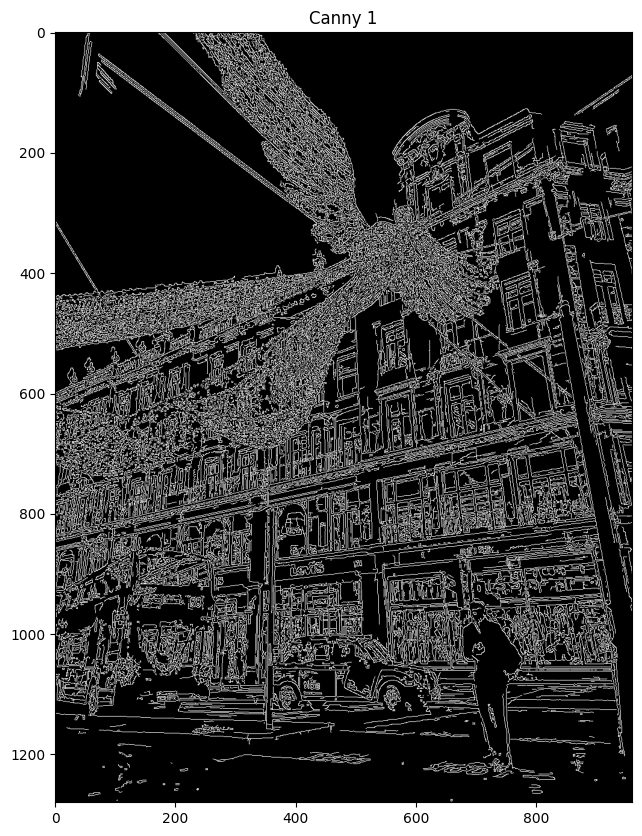

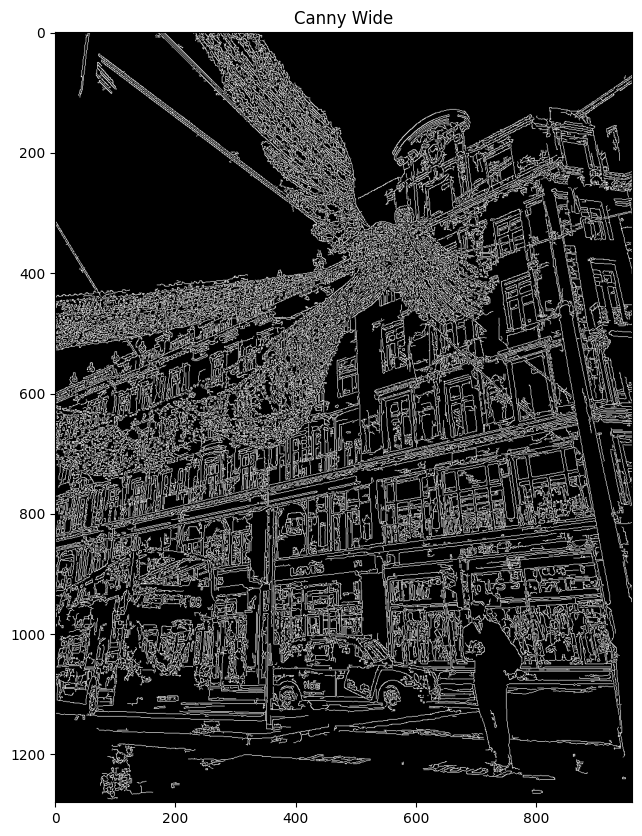

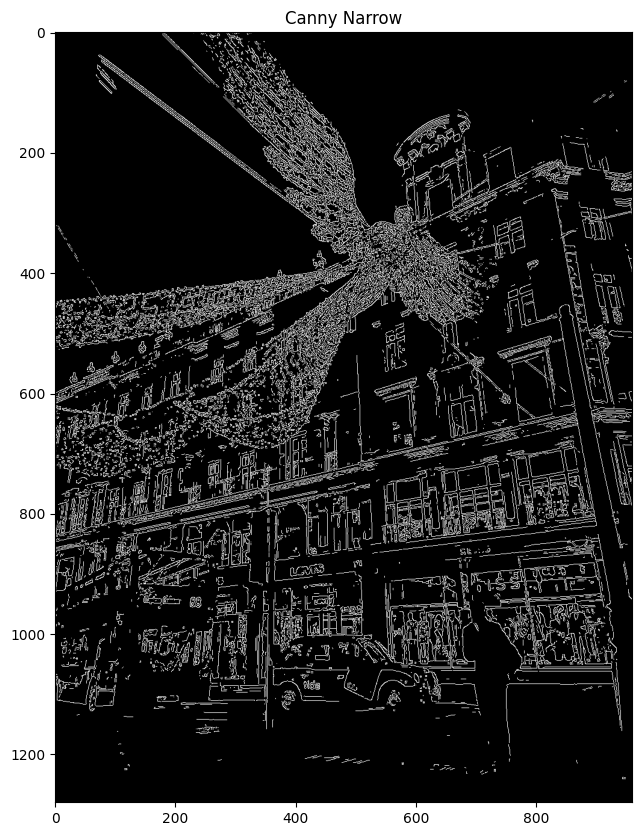

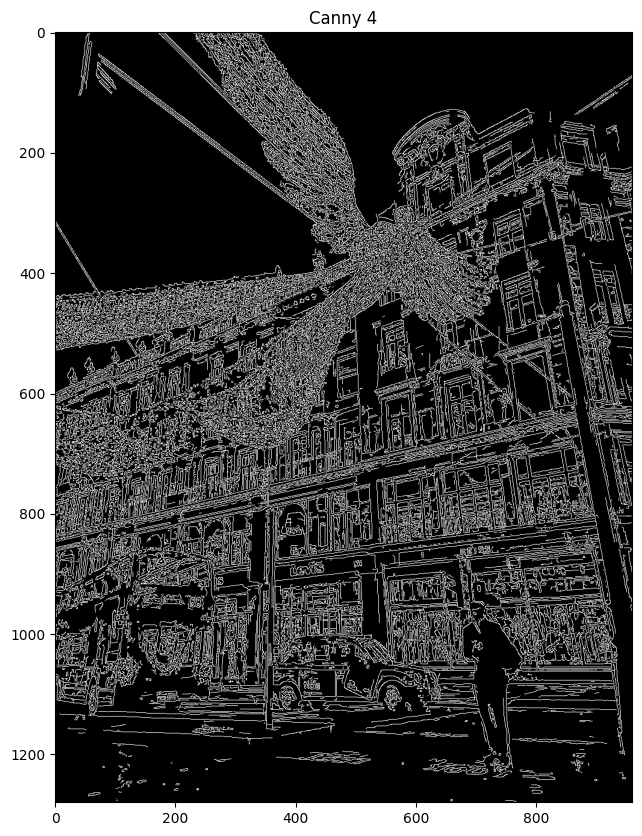

In [ ]:
image = cv2.imread('images/londonxmas.jpeg',0)

# Canny Edge Detection usa valores de gradiente como limites
# O primeiro gradiente de limite
canny = cv2.Canny(image, 50, 120)
imshow('Canny 1', canny)

# Limiares de bordas amplas esperam muitas bordas
canny = cv2.Canny(image, 10, 200)
imshow('Canny Wide', canny)

# Limite estreito, espere menos bordas
canny = cv2.Canny(image, 200, 240)
imshow('Canny Narrow', canny)

canny = cv2.Canny(image, 60, 110)
imshow('Canny 4', canny)

"""  
Então, precisamos fornecer dois valores: limite1 e limite2.. 
Qualquer valor de gradiente maior que limite2 é considerado uma borda. Qualquer valor abaixo do limite1 não é considerado uma borda. 
Values in between threshold1 and threshold2 are either classiﬁed as edges or non-edges based on how their  intensities are “connected”. In this case, any gradient values below 60 are considered non-edges whereas any values above 120 are considered edges.
Valores entre limite 1 e limite2 são classificados como bordas ou não baseados em como suas intensidades são conectadas. Neste caso, qualquer gradient abaixo de 60
são considerados não bordas, enquanto qualquer valor acima de 110 são considerados bordas.
"""

#### **Auto Canny**

52.0
26
69


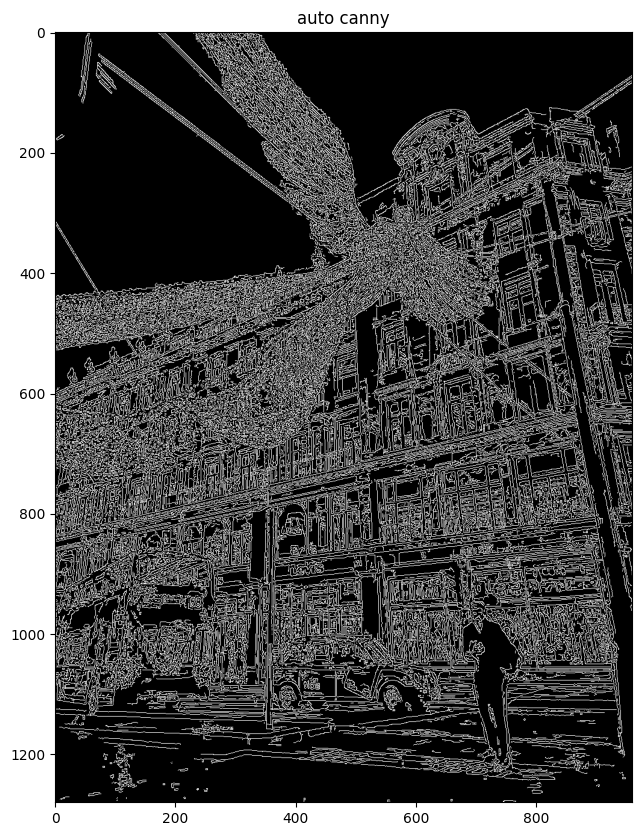

In [ ]:
def autoCanny(image):
  # Encontra limites ideais com base na intensidade média de pixels da imagem
  blurred_img = cv2.blur(image, ksize=(5,5))
  med_val = np.median(image)  #Calcule a mediana ao longo do eixo especificado. Retorna a mediana dos elementos do array.
  print(med_val)
  lower = int(max(0, 0.66 * med_val)) # Criando o limite inferior (valor de cinza para não considerar borda) , com a mediana multiplicado por 0.66 (valor experimental)
  print(lower)
  upper = int(min(255, 1.33 * med_val)) # Criando o limite superior (valor de cinza para considerar borda)
  print(upper)
  edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
  return edges

auto_canny = autoCanny(image)
imshow("auto canny", auto_canny)